# 1.天气查询python小程序

![D](./img/weather.jpg)


In [1]:
#导入库
import requests

##第一步
city_name = '重庆'
#input('请输入要查询的城市名词：')
url = 'http://wthrcdn.etouch.cn/weather_mini?city='
#访问URL
r = requests.get(url+city_name)
#解析json格式的数据
weather_dict = r.json()

if weather_dict.get('desc') == 'invilad-citykey':
    print('您输入的城市未收录')
print('您查询的城市：',weather_dict['data']['city'])
print('--------------------------')
print('今天的天气')
print('温度',weather_dict['data']['wendu'])
print('感冒指数',weather_dict['data']['ganmao'])
print('--------------------------')
print('昨天的天气')
print('昨天：',weather_dict['data']['yesterday']['date'])
print('天气：',weather_dict['data']['yesterday']['type'])
print('最高气温：',weather_dict['data']['yesterday']['high'])
print('最低气温：',weather_dict['data']['yesterday']['low'])
print('风向：',weather_dict['data']['yesterday']['fx'])
print('风力：',weather_dict['data']['yesterday']['fl'][-5:-3])
print('--------------------------')

您查询的城市： 重庆
--------------------------
今天的天气
温度 13
感冒指数 昼夜温差很大，易发生感冒，请注意适当增减衣服，加强自我防护避免感冒。
--------------------------
昨天的天气
昨天： 15日星期六
天气： 小雨
最高气温： 高温 8℃
最低气温： 低温 4℃
风向： 东风
风力： 3级
--------------------------


# 疫情查询
![image.png](./img/Snipaste_2020-02-16_16-56-19.png)

# 涉及到的pandas函数
## pandas.Series.pct_change()函数
本函数可以对一个Series的数据进行处理，获得增长率

`Series.pct_change(self: ~FrameOrSeries, periods=1, fill_method='pad', limit=None, freq=None, **kwargs) `

用于增长率的计算


参数
- 步长, 默认 1 ，正数表示从上到下

- 处理空数据的模式, 默认‘pad’处理NA的数据的方式

- limitint, default None The number of consecutive NAs to fill before stopping.

- freqDateOffset, timedelta, or str, optional Increment to use from time series API (e.g. ‘M’ or BDay()).


## DataFrame.insert()函数
`DataFrame.insert(self, loc, column, value, allow_duplicates=False)`

该函数插入值为value，列名为column的Series到DataFrame中的某个位置
参数
- loc int，loc = 1 ，表示插入到新的DataFrame的第 1 位置
- column str,number ，插入列的列名
- value 插入的列的值

## Data.Frame.append()函数
如果列名相同，则叠加在该DataFrame的下方

`DataFrame.append(self, other, ignore_index=False, verify_integrity=False, sort=False)`

Parameters
- ohter 是其他的df，可以是一个列表装有多个df
- ignore_index 处理index的问题，避免出现多个相同的index通常写True
- sort 是否对列名进行重排列，按字母顺序

In [1]:
# 疫情数据查询API
import requests
import pandas as pd 


import seaborn as sns 
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=8)
%matplotlib inline

In [7]:
#api地址
api_url = 'https://tianqiapi.com/api'
#从api获取数据
params = {'appid':'43717896','appsecret':'qsoHmQ4f','version':'epidemic'}
r = requests.get(api_url,params)
nCov_data = r.json()['data']
area = nCov_data['area']
#统计各个地区的数据
Tmp=[]
for i in range(len(area)):
    name = area[i]['provinceName']
    province = pd.DataFrame(area[i]['cities'])
    province.insert(loc=0,column='provinceName',value = name)
    Tmp.append(province)
allArea = Tmp[0].append(Tmp[1:],ignore_index = True,sort=False)

#全国历史数据
History_day= pd.DataFrame(nCov_data['history'],columns=['date','confirmedNum','curesNum','curesRatio','deathsNum','deathsRatio',
                                                        'suspectedIncr','suspectedIncrStr','suspectedNum','suspectedNumStr','treatingNum'])
# 插入日增长率
History_day.insert(loc=2,column='daily_incresing_rate',value=History_day.confirmedNum.pct_change(periods=-1))

In [8]:
def query_city(province):
    city_data = allArea[allArea.provinceName==province]
    print(city_data)
    f, ax= plt.subplots(figsize = (14, 10))
    #将x轴的标签旋转90度，避免太挤
    ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
    sns.barplot(city_data.cityName,city_data.confirmedCount)
    plt.title('city_name 和 confirmedCount的条形图')


    provinceName cityName  confirmedCount  curedCount  deadCount  \
122           重庆      万州区           108.0        41.0        3.0   
123           重庆      江北区            28.0         5.0        0.0   
124           重庆      云阳县            25.0        17.0        0.0   
125           重庆      合川区            23.0         7.0        0.0   
126           重庆      綦江区            23.0         7.0        0.0   
127           重庆      长寿区            21.0         9.0        0.0   
128           重庆      渝中区            20.0        12.0        0.0   
129           重庆     九龙坡区            20.0        10.0        1.0   
130           重庆      垫江县            20.0         6.0        0.0   
131           重庆       忠县            20.0        12.0        0.0   
132           重庆      开州区            20.0        13.0        1.0   
133           重庆      奉节县            20.0         7.0        0.0   
134           重庆      潼南区            18.0         2.0        0.0   
135           重庆     两江新区            17.0       

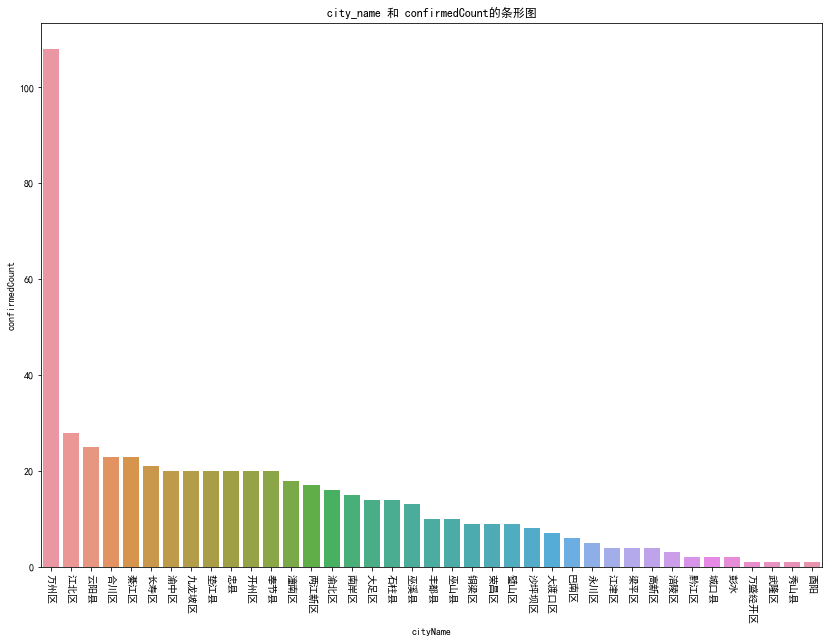

In [9]:
query_city('重庆')

# 2. 疫情数据查询API调用

In [1]:
# 疫情数据查询API
import requests
import pandas as pd 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns 
import time 
import numpy as np 
plt.rc('font', family='SimHei', size=8)
%matplotlib inline

请求接口：/nCoV/api/overall
请求方式：GET
返回自爬虫运行开始（2020年1月24日下午4:00）至今，病毒研究情况以及全国疫情概览，可指定返回数据为最新发布数据或时间序列数据。

请求接口：/nCoV/api/area
请求方式：GET
返回自2020年1月22日凌晨3:00（爬虫开始运行）至今，中国所有省份、地区或直辖市及世界其他国家的所有疫情信息变化的时间序列数据（精确到市），能够追溯确诊/疑似感染/治愈/死亡人数的时间序列。
注：自2020年1月22日凌晨3:00至2020年1月24日凌晨3:40之间的数据只有省级数据，自2020年1月24日起，丁香园才开始统计并公开市级数据。

In [2]:
def provincesList():
    api_url = 'https://lab.isaaclin.cn/nCoV/api/provinceName'
    #从api获取数据
    r = requests.get(api_url)
    list_province = r.json()['results']
    return list_province


def timestampMs2Date(timestamp):
    #转换成localtime
    timestamp = int(timestamp/1000)
    time_local=time.localtime(timestamp)
    #转换成时间格式：%Y_%m_%d %H:%M:%S
    dt=time.strftime("%Y-%m-%d %H:%M:%S",time_local)
    return dt 
def turn_to_list_index(province,cityName):
    return [tuple([province,city_name]) for city_name in cityName]
def mkdir(path): 
    if os.path.isdir(path):
        pass 
    else:
        os.makedirs(path)



        

    
def downloadRealDate():
    foreign = ['伊朗',
'俄罗斯',
'加拿大',
'印度',
'台湾',
'埃及',
'尼泊尔',
'德国',
'意大利',
'斯里兰卡',
'新加坡',
'日本',
'柬埔寨',
'比利时',
'法国',
'泰国',
'澳大利亚',
'澳门',
'瑞典',
'美国',
'芬兰',
'英国',
'菲律宾',
'西班牙',
'越南',
'钻石公主号邮轮',
'阿联酋',
'韩国',
'香港',
'马来西亚']
    #api地址
    api_url = 'https://lab.isaaclin.cn/nCoV/api/area'
    provinces = provincesList()
    Tmp_province =[]
    Tmp_city = []
    Tmp_foreign = []

    for province in provinces:
        params = {'latest':1,'province':province}

        if province not in foreign:
            params = {'latest':1,'province':province}
            require_data = requests.get(api_url,params).json()
            if require_data['success']is True:
                realData = require_data['results'][0]
                realCityDate = realData.pop('cities')
                Tmp_city.append(realCityDate)
                Tmp_province.append(realData)
        else:
            params = {'latest':1,'province':province}
            require_data = requests.get(api_url,params).json()
            if require_data['success']is True:
                realData = require_data['results'][0]
                Tmp_foreign.append(realData)

    realCity = pd.DateFrame(Tmp_city)
    realProvince = pd.DataFrame(Tmp_province)
    realForeign = pd.DataFrame(Tmp_foreign)
    return realCity,realProvincel,realForeign

    
def requireDate():
    #从所有数据中按时间分类，使用.date()获取对应的天数据
    resortDate = []
    df=pd.read_csv('d://nCov//allData.csv')
    df.updateTime = pd.to_datetime(df.updateTime)
    for day in df.updateTime.apply(lambda x : x.date()).unique():
        print(day)
        currentDay = df[df.updateTime.apply(lambda x:x.date()) == day]
        #在对应的某天数据中筛选出某一个省的数据，
        for province in currentDay.provinceName.unique():
            currentProvince = currentDay[currentDay['provinceName']== province]
            #在对应的某天某省的数据中筛选出某市
            for city in currentProvince.cityName.unique():
                #获得的某天某省某市不同时间的数据， 这个地方可能会报错原因是 当天的数据还未更新
                currentCity = currentProvince[currentProvince['cityName'] == city]
                resortDate.append(currentCity.iloc[0])

    resortDate = pd.DataFrame(resortDate)
    resortDate.updateTime = resortDate.updateTime.apply(lambda x : x.date())
    resortDate.to_csv('d://nCov//Data.csv')
    return resortDate



# 使用此函数既可以下载

def download_province_nCov():
    # 使用此函数既可以下载所有nCov的数据啦

        #建立文件树
    os.chdir('d://')
    file_root_path = 'd://nCov'
    mkdir(file_root_path)

    #api地址
    api_url = 'https://lab.isaaclin.cn/nCoV/api/area'
    #从api获取数据
    foreign = ['伊朗','俄罗斯','加拿大','印度','台湾','埃及','尼泊尔','德国','意大利','斯里兰卡','新加坡',
               '日本','柬埔寨','比利时','法国','泰国','澳大利亚','澳门','瑞典','美国','芬兰','英国','菲律宾','西班牙',
               '越南','钻石公主号邮轮','阿联酋','韩国','香港','马来西亚']
    provinceChina = ['上海市','云南省','内蒙古自治区', '北京市', '吉林省', '四川省', '天津市', '宁夏回族自治区', '安徽省', '山东省',
 '山西省', '广东省', '广西壮族自治区', '新疆维吾尔自治区', '江苏省', '江西省', '河北省', '河南省', '浙江省', '海南省',
 '湖北省', '湖南省', '甘肃省', '福建省', '西藏自治区', '贵州省', '辽宁省', '重庆市', '陕西省', '青海省', '黑龙江省']

    #api地址
    provinces = provincesList()
    Tmp_province =[]
    Tmp_city = []
    Tmp_foreign =[]
    for province in provinces:
        if province  in provinceChina:
            #国内省份
            params = {'latest':0,'province':province}
            r = requests.get(api_url,params)
            require_data = r.json()
            if require_data['success']is True:
                provinceDate = require_data['results']
                for times in provinceDate:
                    creat_time = times['updateTime']
                    times['updateTime'] = timestampMs2Date(creat_time)
                    cities = times.pop('cities')
                    cities = pd.DataFrame(cities)
                    Tmp_province.append(times)
                    if cities.empty:
                        pass
                    else:
                        cityName = cities.pop('cityName')

                        cities.insert(0,column='cityName',value=cityName)
                        cities.insert(0,column='provinceName',value=province)
                        cities.insert(0,column='updateTime',value = timestampMs2Date(creat_time))
                        cities['updateTime'] =cities['updateTime'] .astype('datetime64')
                        Tmp_city.append(cities)
        #国外城市的数据
        else :
            params = {'latest':0,'province':province}
            r = requests.get(api_url,params)
            require_data = r.json()
            if require_data['success']is True:
                foreignDate = require_data['results']
                for times in foreignDate: 
                    creat_time = times['updateTime']
                    times['updateTime'] = timestampMs2Date(creat_time)
                    Tmp_foreign.append(times)




    #包含疫情爆发后所有省份的所有城市的数据                    
    cityDateHistory = Tmp_city[0].append(Tmp_city[1:],ignore_index=True)      
    #疫情爆发后所有省份的所有数据。
    provinceDateHistory = pd.DataFrame(Tmp_province)
    #疫情爆发后国外的数据
    foreignDateHistory = pd.DataFrame(Tmp_foreign)

    #获得整理好的所有城市的所有历史数据
    resortDate = []
    df =cityDateHistory
    df.updateTime = pd.to_datetime(df.updateTime)
    for day in df.updateTime.apply(lambda x : x.date()).unique():
        currentDay = df[df.updateTime.apply(lambda x:x.date()) == day]
        #在对应的某天数据中筛选出某一个省的数据，
        for province in currentDay.provinceName.unique():
            currentProvince = currentDay[currentDay['provinceName']== province]
            #在对应的某天某省的数据中筛选出某市
            for city in currentProvince.cityName.unique():
                #获得的某天某省某市不同时间的数据， 这个地方可能会报错原因是 当天的数据还未更新
                currentCity = currentProvince[currentProvince['cityName'] == city]
                resortDate.append(currentCity.iloc[0])

    resortCityDate = pd.DataFrame(resortDate)
    resortCityDate.updateTime = resortCityDate.updateTime.apply(lambda x : x.date())
    resortCityDate.to_csv('d://nCov//Data.csv')


    #获得整理好的国内省份数据

    resortDate = []
    df =provinceDateHistory
    df.updateTime = pd.to_datetime(df.updateTime)
    for day in df.updateTime.apply(lambda x : x.date()).unique():
        currentDay = df[df.updateTime.apply(lambda x:x.date()) == day]
        #在对应的某天数据中筛选出某一个省的数据，
        for province in currentDay.provinceName.unique():
            currentProvince = currentDay[currentDay['provinceName']== province]
            resortDate.append(currentProvince.iloc[0])

    resortProvinceDate = pd.DataFrame(resortDate)
    resortProvinceDate.updateTime = resortProvinceDate.updateTime.apply(lambda x : x.date())
    resortProvinceDate.to_csv('d://nCov//Data_Province.csv')

    #整理好的  国外的数据
    resortDate = []
    df =foreignDateHistory
    df.updateTime = pd.to_datetime(df.updateTime)
    for day in df.updateTime.apply(lambda x : x.date()).unique():
        currentDay = df[df.updateTime.apply(lambda x:x.date()) == day]
        #在对应的某天数据中筛选出某一个国家的数据，
        for province in currentDay.provinceName.unique():
            currentProvince = currentDay[currentDay['provinceName']== province]
            resortDate.append(currentProvince.iloc[0])

    resortForeignDate = pd.DataFrame(resortDate)
    resortForeignDate.updateTime = resortForeignDate.updateTime.apply(lambda x : x.date())
    resortForeignDate.to_csv('d://nCov//Data_Foreign.csv')

    return resortCityDate,resortProvinceDate,resortForeignDate

In [23]:
#download_province_nCov()
resortForeignDate = pd.read_csv('D://nCov/Data_Foreign.csv')[['updateTime','provinceEnglishName','curedCount','confirmedCount','currentConfirmedCount','deadCount','provinceName']].dropna(how='any',subset=['provinceEnglishName']).replace('United Kiongdom','United Kingdom')
resortProvinceDate =pd.read_csv('D://nCov/Data_Province.csv')[['updateTime','provinceEnglishName','curedCount','confirmedCount','currentConfirmedCount','deadCount','provinceName']].dropna(how='any',subset=['provinceEnglishName'])
resortCityDate = pd.read_csv('d://nCov/Data.csv')[['updateTime','provinceName','cityEnglishName','curedCount','confirmedCount','currentConfirmedCount','deadCount','provinceName']].dropna(how='any',subset=['cityEnglishName'])



In [26]:
resortProvinceDate[resortProvinceDate['updateTime'] =='2020-02-28'].sum()

updateTime               2020-02-282020-02-282020-02-282020-02-282020-0...
provinceEnglishName      ShanghaiYunnanNeimengguBeijingJilinSichuanTian...
curedCount                                                           35976
confirmedCount                                                       78466
currentConfirmedCount                                                39705
deadCount                                                             2785
provinceName             上海市云南省内蒙古自治区北京市吉林省四川省天津市安徽省山东省山西省广东省广西壮族自治区新疆维...
dtype: object

In [7]:
resortCityDate.updateTime = pd.to_datetime(resortCityDate.updateTime)
resortProvinceDate.updateTime = pd.to_datetime(resortProvinceDate.updateTime)
resortForeignDate.updateTime = pd.to_datetime(resortForeignDate.updateTime)


In [25]:
resortProvinceDate[resortProvinceDate['updateTime'] =='2020-02-29']

,updateTime,provinceEnglishName,curedCount,confirmedCount,currentConfirmedCount,deadCount,provinceName
0,2020-02-29,Shanghai,287,337,47.0,3,上海市
1,2020-02-29,Yunnan,157,174,15.0,2,云南省
2,2020-02-29,Neimenggu,49,75,26.0,0,内蒙古自治区
3,2020-02-29,Beijing,271,411,132.0,8,北京市
4,2020-02-29,Jilin,75,93,17.0,1,吉林省
5,2020-02-29,Sichuan,351,538,184.0,3,四川省
6,2020-02-29,Tianjin,109,136,24.0,3,天津市
7,2020-02-29,Ningxia,69,73,4.0,0,宁夏回族自治区
8,2020-02-29,Anhui,868,990,116.0,6,安徽省
9,2020-02-29,Shandong,421,756,329.0,6,山东省


#### 画图

In [8]:
import pandas as pd
import plotly.graph_objs as go
import dash
import dash_table 
import dash_core_components as dcc                  # 交互式组件
import dash_html_components as html                 # 代码转html
from dash.dependencies import Input, Output         # 回调
from jupyter_plotly_dash import JupyterDash 
from datetime import datetime, timedelta

### 数据处理

In [9]:
#国内省份
usedDate = resortProvinceDate
Tmp =[]
for day in usedDate.updateTime.unique():
    DateDict = {}
    oneDay = usedDate[usedDate['updateTime'] == day ]
    #确诊人数
    DateDict['confirmedCount']=oneDay['confirmedCount'].sum()
    # 治愈人数
    DateDict['curedCount']=oneDay['curedCount'].sum()
    DateDict['currentConfirmedCount'] = oneDay['currentConfirmedCount'].sum()
    # 死亡人数
    DateDict['deadCount']=oneDay['deadCount'].sum()
    #疑似人数
    DateDict['Date'] = day
    Tmp.append(DateDict)
MainlandDate = pd.DataFrame(Tmp).sort_values(by='Date', ascending=False)

#国外的情况
usedDate = resortForeignDate
Tmp =[]
for day in usedDate.updateTime.unique():
    DateDict = {}
    oneDay = usedDate[usedDate['updateTime'] == day ]
    #确诊人数
    DateDict['confirmedCount']=oneDay['confirmedCount'].sum()
    # 治愈人数
    DateDict['curedCount']=oneDay['curedCount'].sum()
    DateDict['currentConfirmedCount'] = oneDay['currentConfirmedCount'].sum()
    # 死亡人数
    DateDict['deadCount']=oneDay['deadCount'].sum()
    DateDict['Date'] = day
    Tmp.append(DateDict)
ForeignDate = pd.DataFrame(Tmp).sort_values(by='Date', ascending=False)

curedDate = pd.DataFrame({'Date':MainlandDate['Date'],
                          'Mainland':MainlandDate['curedCount'],
                          'Foreign':ForeignDate['curedCount'],
                          'Total':MainlandDate['curedCount']+ForeignDate['curedCount'] })

deadDate = pd.DataFrame({'Date':MainlandDate['Date'],
                          'Mainland':MainlandDate['deadCount'],
                          'Foreign':ForeignDate['deadCount'],
                          'Total':MainlandDate['deadCount']+ForeignDate['deadCount'] })


confirmedDate = pd.DataFrame({'Date':MainlandDate['Date'],
                          'Mainland':MainlandDate['confirmedCount'],
                          'Foreign':ForeignDate['confirmedCount'],
                          'Total':MainlandDate['confirmedCount']+ForeignDate['confirmedCount'] })



## 计算增长率

### 按国家绘制

In [10]:
def countRate(df):
    listCountryRate = []
    for country in df.provinceName.unique():
        dfCountry = df[df.provinceName==country]
        curedRate =dfCountry.curedCount.pct_change(periods=-1)
        confirmedRate= dfCountry.confirmedCount.pct_change(periods=-1)
        deadRate = dfCountry.deadCount.pct_change(periods=-1)
        dfRate = pd.DataFrame({'country':country,'curedRate':curedRate,'deadRate':deadRate,'confirmedRate':confirmedRate})
        listCountryRate.append(dfRate)
    return listCountryRate[0].append(listCountryRate[1:],ignore_index=True)

In [11]:
# 每日新增比例
confirmedRateMainland = confirmedDate.Mainland.pct_change(periods=-1)
confirmedRateForeign = confirmedDate.Foreign.pct_change(periods=-1)

In [8]:
import numpy as np 
np.linspace(round(confirmedRateMainland.min())*100,round(confirmedRateMainland.max())*100,21)


array([-100.,  -75.,  -50.,  -25.,    0.,   25.,   50.,   75.,  100.,
        125.,  150.,  175.,  200.,  225.,  250.,  275.,  300.,  325.,
        350.,  375.,  400.])

In [12]:
# 每日新增比例
confirmedRateMainland = confirmedDate.Mainland.pct_change(periods=-1)
confirmedRateForeign = confirmedDate.Foreign.pct_change(periods=-1)

fig_Grow = go.Figure()

fig_Grow.add_trace(go.Scatter(x=confirmedDate.Date
                              ,y=confirmedRateMainland
                              ,mode='lines+markers'
                              ,name='中国大陆日增长率'
                              ,line=dict(color='#921113', width=3)
                              ,marker=dict(size=8, color='#f4f4f2',
                                               line=dict(width=1,color='#921113'))
                              ,text=[datetime.strftime(d, '%b %d %Y AEDT') for d in confirmedDate.Date]
                              ,hovertext=['中国大陆日增长确诊率:{:.2f}%<br>'.format(i*100) for i in confirmedRateMainland]
                              ,hovertemplate='<b>%{text}</b><br></br>'+'%{hovertext}'+'<extra></extra>')
                              )


# Customise layout
fig_Grow.update_layout(
    title=dict(
        text="<b>nCov日增长率<b>",
        y=0.96, x=0.5, xanchor='center', yanchor='top',
        font=dict(size=20, color="#292929", family="Playfair Display")
    ),
    margin=go.layout.Margin(
        l=10,
        r=10,
        b=10,
        t=5,
        pad=0
    ),
    yaxis=dict(
        showline=True, linecolor='#272e3e',
        zeroline=False,
        gridcolor='#cbd2d3',
        gridwidth = .1,
        tickmode='array',
        # Set tick range based on the maximum number
        tickvals=tickList,
        # Set tick label accordingly
        ticktext=["{:.2f}%".format(i) for i in np.linspace(round(confirmedRateMainland.min())*100,round(confirmedRateMainland.max())*100,21)]
    ),
#    yaxis_title="Total Confirmed Case Number",
    xaxis=dict(
        showline=True, linecolor='#272e3e',
        gridcolor='#cbd2d3',
        gridwidth = .1,
        zeroline=False
    ),
    xaxis_tickformat='%b %d',
    hovermode = 'x',
    legend_orientation="h",
#    legend=dict(x=.35, y=-.05),
    plot_bgcolor='#f4f4f2',
    paper_bgcolor='#cbd2d3',
    font=dict(color='#292929')
)

fig_Grow.show()


NameError: name 'tickList' is not defined

### 死亡/治愈人数图

In [ ]:
# Line plot for confirmed cases
# Set up tick scale based on confirmed case number
tickList = list(np.arange(0, deadDate['Mainland'].max()+1000, 2000))

# Create empty figure canvas
fig_Dead = go.Figure()
# Add trace to the figure
fig_Dead.add_trace(go.Scatter(x=deadDate['Date'], y=deadDate['Mainland'],
                                   mode='lines+markers',
                                   name='Mainland China',
                                   line=dict(color='#921113', width=3),
                                   marker=dict(size=8, color='#f4f4f2',
                                               line=dict(width=1,color='#921113')),
                                   text=[datetime.strftime(d, '%b %d %Y AEDT') for d in deadDate['Date']],
                                   hovertext=['Mainland China dead Date<br>{:,d} cases<br>'.format(i) for i in deadDate['Mainland']],
                                   hovertemplate='<b>%{text}</b><br></br>'+
                                                 '%{hovertext}'+
                                                 '<extra></extra>'))
fig_Dead.add_trace(go.Scatter(x=curedDate['Date'], y=curedDate['Mainland'],
                                   mode='lines+markers',
                                   name='Mainland China',
                                   line=dict(color='#921113', width=3),
                                   marker=dict(size=8, color='#f4f4f2',
                                               line=dict(width=1,color='#921113')),
                                   text=[datetime.strftime(d, '%b %d %Y AEDT') for d in curedDate['Date']],
                                   hovertext=['Mainland China cured Date<br>{:,d} cases<br>'.format(i) for i in curedDate['Mainland']],
                                   hovertemplate='<b>%{text}</b><br></br>'+
                                                 '%{hovertext}'+
                                                 '<extra></extra>'))
# Customise layout
fig_Dead.update_layout(
    title=dict(
        text="<b>Recoverd/Death Case Timeline<b>",
        y=0.96, x=0.5, xanchor='center', yanchor='top',
        font=dict(size=20, color="#292929", family="Playfair Display")
    ),
    margin=go.layout.Margin(
        l=10,
        r=10,
        b=10,
        t=5,
        pad=0
    ),
    yaxis=dict(
        showline=True, linecolor='#272e3e',
        zeroline=False,
        gridcolor='#cbd2d3',
        gridwidth = .1,
        tickmode='array',
        # Set tick range based on the maximum number
        tickvals=tickList,
        # Set tick label accordingly
        ticktext=["{:.0f}k".format(i/1000) for i in tickList]
    ),
#    yaxis_title="Total Confirmed Case Number",
    xaxis=dict(
        showline=True, linecolor='#272e3e',
        gridcolor='#cbd2d3',
        gridwidth = .1,
        zeroline=False
    ),
    xaxis_tickformat='%b %d',
    hovermode = 'x',
    legend_orientation="h",
#    legend=dict(x=.35, y=-.05),
    plot_bgcolor='#f4f4f2',
    paper_bgcolor='#cbd2d3',
    font=dict(color='#292929')
)

fig_Dead.show()

#### 画确诊人数图

In [ ]:
# Line plot for confirmed cases
# Set up tick scale based on confirmed case number
tickList = list(np.arange(0, confirmedDate['Mainland'].max()+1000, 2000))

# Create empty figure canvas
fig_confirmed = go.Figure()
# Add trace to the figure
fig_confirmed.add_trace(go.Scatter(x=confirmedDate['Date'], y=confirmedDate['Mainland'],
                                   mode='lines+markers',
                                   name='Mainland China',
                                   line=dict(color='#921113', width=3),
                                   marker=dict(size=8, color='#f4f4f2',
                                               line=dict(width=1,color='#921113')),
                                   text=[datetime.strftime(d, '%b %d %Y AEDT') for d in confirmedDate['Date']],
                                   hovertext=['Mainland China confirmed<br>{:,d} cases<br>'.format(i) for i in confirmedDate['Mainland']],
                                   hovertemplate='<b>%{text}</b><br></br>'+
                                                 '%{hovertext}'+
                                                 '<extra></extra>'))
fig_confirmed.add_trace(go.Scatter(x=confirmedDate['Date'], y=confirmedDate['Foreign'],
                                   mode='lines+markers',
                                   name='Other Region',
                                   line=dict(color='#eb5254', width=3),
                                   marker=dict(size=8, color='#f4f4f2',
                                               line=dict(width=1,color='#eb5254')),
                                   text=[datetime.strftime(d, '%b %d %Y AEDT') for d in confirmedDate['Date']],
                                   hovertext=['Other locations confirmed<br>{:,d} cases<br>'.format(i) for i in confirmedDate['Foreign']],
                                   hovertemplate='<b>%{text}</b><br></br>'+
                                                 '%{hovertext}'+
                                                 '<extra></extra>'))
# Customise layout
fig_confirmed.update_layout(
    title=dict(
        text="<b>Confirmed Cases Timeline<b>",
        y=0.96, x=0.5, xanchor='center', yanchor='top',
        font=dict(size=20, color="#292929", family="Playfair Display")
    ),
    margin=go.layout.Margin(
        l=10,
        r=10,
        b=10,
        t=5,
        pad=0
    ),
    yaxis=dict(
        showline=True, linecolor='#272e3e',
        zeroline=False,
        gridcolor='#cbd2d3',
        gridwidth = .1,
        tickmode='array',
        # Set tick range based on the maximum number
        tickvals=tickList,
        # Set tick label accordingly
        ticktext=["{:.0f}k".format(i/1000) for i in tickList]
    ),
#    yaxis_title="Total Confirmed Case Number",
    xaxis=dict(
        showline=True, linecolor='#272e3e',
        gridcolor='#cbd2d3',
        gridwidth = .1,
        zeroline=False
    ),
    xaxis_tickformat='%b %d',
    hovermode = 'x',
    legend_orientation="h",
#    legend=dict(x=.35, y=-.05),
    plot_bgcolor='#f4f4f2',
    paper_bgcolor='#cbd2d3',
    font=dict(color='#292929')
)

fig_confirmed.show()

## 世界nCov感染者数据地图绘制

In [13]:
#查询外国的地理数据

#去掉砖石公主号的数据
resortForeignDate = resortForeignDate[~resortForeignDate['provinceEnglishName'].isin(['Diamond Princess Cruise Ship'])]

In [14]:
'''
from opencage.geocoder import OpenCageGeocode
key = '834b1244b561455e8087b53dda2e96f5'  # get api key from:  https://opencagedata.com
geocoder = OpenCageGeocode(key)
listCountry = []
listLat = []
listLong = []
for country in resortForeignDate['provinceEnglishName'].unique():
    query = str(country)
    results = geocoder.geocode(query)
    try:
        lat = results[0]['geometry']['lat']
        long = results[0]['geometry']['lng']
        listLat.append(lat)
        listLong.append(long)
        listCountry.append(country)
    except:
        print(country)
ForeignPlace = pd.DataFrame({'country':listCountry,'lat':listLat,'lng':listLong})
ForeignPlace.to_csv('d://nCov/foreignPlace.csv')
'''

"\nfrom opencage.geocoder import OpenCageGeocode\nkey = '834b1244b561455e8087b53dda2e96f5'  # get api key from:  https://opencagedata.com\ngeocoder = OpenCageGeocode(key)\nlistCountry = []\nlistLat = []\nlistLong = []\nfor country in resortForeignDate['provinceEnglishName'].unique():\n    query = str(country)\n    results = geocoder.geocode(query)\n    try:\n        lat = results[0]['geometry']['lat']\n        long = results[0]['geometry']['lng']\n        listLat.append(lat)\n        listLong.append(long)\n        listCountry.append(country)\n    except:\n        print(country)\nForeignPlace = pd.DataFrame({'country':listCountry,'lat':listLat,'lng':listLong})\nForeignPlace.to_csv('d://nCov/foreignPlace.csv')\n"

In [15]:
ForeignDate = pd.read_csv('d://nCov/foreignPlace.csv',index_col=0)


In [16]:
#国内省份的数据
ChinaPlace = pd.read_csv('d://nCov/provincePlace.csv',index_col=0)
 

In [17]:
#画中国省份和国外国家的感染数据
ChinaPlace.columns =[ 'placeName', 'lat', 'lng']
ForeignDate.columns =[ 'placeName', 'lat', 'lng']

crossDateList = ChinaPlace.append(ForeignDate,ignore_index=True)

In [18]:
crossDate =  resortProvinceDate[resortProvinceDate['updateTime'] ==resortProvinceDate['updateTime'].unique()[0]].append(resortForeignDate[resortForeignDate['updateTime'] ==resortForeignDate['updateTime'].unique()[0]],ignore_index=True)
crossDate=crossDate.rename(columns={'provinceEnglishName':'placeName','provinceName':'placename'})
crossDate.head()


,updateTime,placeName,curedCount,confirmedCount,currentConfirmedCount,deadCount,placename
0,2020-02-29,Shanghai,287,337,47.0,3,上海市
1,2020-02-29,Yunnan,157,174,15.0,2,云南省
2,2020-02-29,Neimenggu,49,75,26.0,0,内蒙古自治区
3,2020-02-29,Beijing,271,411,132.0,8,北京市
4,2020-02-29,Jilin,75,93,17.0,1,吉林省


In [16]:
wordMapDate = pd.merge(crossDateList.sort_values(by='placeName'),crossDate.sort_values(by='placeName'),on='placeName')
wordMapDate.head()

,placeName,lat,lng,updateTime,curedCount,confirmedCount,currentConfirmedCount,deadCount,placename
0,Anhui,32.000000,117.000000,2020-02-25,708,989,275.0,6,安徽省
1,Australia,-24.776109,134.755000,2020-02-25,15,22,7.0,0,澳大利亚
2,Beijing,39.906217,116.391276,2020-02-25,215,400,181.0,4,北京市
3,Canada,61.066692,-107.991707,2020-02-25,4,11,7.0,0,加拿大
4,Chongqing,29.558571,106.549282,2020-02-25,349,576,221.0,6,重庆市


In [27]:
def plotlyWordMap(wordMapDate):
    mapbox_access_token='pk.eyJ1IjoieHV0aW5nZmVuZzEiLCJhIjoiY2s3MGF1dmZ6MHduMDNsbXZnZzNpNndmYSJ9.uHSe5THmmSEwpn-VY2iFXg'

    fig1 = go.Figure(go.Scattermapbox(
        lat=wordMapDate['lat'],
        lon=wordMapDate['lng'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            color='#ca261d',
            size=wordMapDate['currentConfirmedCount'].tolist(), 
            sizemin=2,
            sizemode='area',
            sizeref=2.*max(wordMapDate['currentConfirmedCount'].tolist())/(80.**2),
        ),
        text=wordMapDate['placename'],
        hovertext=['Comfirmed: {}<br>Recovered: {}<br>Death: {}'.format(i, j, k) for i, j, k in zip(wordMapDate['currentConfirmedCount'],
                                                                                                    wordMapDate['curedCount'],
                                                                                                    wordMapDate['deadCount'])],
    
        hovertemplate = "<b>%{text}</b><br><br>" +
                        "%{hovertext}<br>" +
                        "<extra></extra>")
    
        )
    fig1.update_layout(
    #    title=dict(
    #        text="<b>Latest Coronavirus Outbreak Map<b>",
    #        y=0.96, x=0.5, xanchor='center', yanchor='top',
    #        font=dict(size=20, color="#292929", family="Playfair Display")
    #    ),
        plot_bgcolor='#151920',
        paper_bgcolor='#cbd2d3',
        margin=go.layout.Margin(
            l=10,
            r=10,
            b=10,
            t=0,
            pad=40
        ),
        hovermode='closest',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            style="light",
            bearing=0,
            center=go.layout.mapbox.Center(
                lat=31.1517252, 
                lon=112.8783222
            ),
            pitch=0,
            zoom=4
        )
    )
    return fig1 
    

In [28]:
fig1 = plotlyWordMap(wordMapDate)
fig1.show()

In [18]:
app = JupyterDash('test')
app.layout= html.Div(
    children = [dcc.Graph(id = 'graph-with-slider',figure = fig1),
                dcc.Slider(
                id = 'day-slider',
                min =resortForeignDate.updateTime.min(),
                max = resortForeignDate.updateTime.max(),
                value=resortForeignDate.updateTime.min(),
                marks = {str(day):str(day) for day in resortForeignDate.updateTime.unique()},
                step = None )
                ])


app 

NameError: name 'fig1' is not defined

#### 画 slider决定的世界地图


In [30]:

sliderMap = resortProvinceDate.append(resortForeignDate,ignore_index=True)
app = JupyterDash('test')
app.layout= html.Div(
    children = [dcc.Graph(id = 'graph-with-slider'),
                dcc.Slider(
                id = 'day-slider',
                min =0,
                max = len(resortProvinceDate.updateTime.unique()),
                value=9,
                marks = {i:day for i,day in enumerate(resortProvinceDate.updateTime.unique())},
                step = None  )
                ])

# 回调函数
@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('day-slider', 'value')]
)

# 设置布局
def update_figure(selected_year):

    wordMapDate = sliderMap[sliderMap.updateTime== selected_year]
    fig1 = plotlyWordMap(wordMapDate)
    return fig1 
    
app


### 文本编辑处 Markdown

In [19]:
text_notes = '''
#### Coronavirus (COVID-19) Outbreak Global Cases Monitor
On Dec 31, 2019, the World Health Organization (WHO) was informed of \
                    an outbreak of “pneumonia of unknown cause” detected in Wuhan City, Hubei Province, China – the \
                    seventh-largest city in China with 11 million residents. As of {}, there are over {:,d} cases \
                    of COVID-19 confirmed globally.\
                    This dash board is developed to visualise and track the recent reported \
                    cases on a daily timescale.

'''.format(confirmedDate.iloc[0,0],confirmedDate.iloc[0,-1])






In [20]:
daysOutbreak = (datetime.today() - datetime(2019,12,31)).days

plusConfirmedNum = confirmedDate.Mainland[0] - confirmedDate.Mainland[1]
plusPercentNum1 = confirmedDate.Mainland.pct_change(periods=-1)[0]
confirmedCases = confirmedDate.Mainland[0]



plusRecoveredNum =curedDate.Mainland[0] - curedDate.Mainland[1]
plusPercentNum2 = curedDate.Mainland.pct_change(periods = -1)[0]
recoveredCases = curedDate.Mainland[0]

plusDeathNum = deadDate.Mainland[0]- deadDate.Mainland[1] 
plusPercentNum3 =  deadDate.Mainland.pct_change(periods = -1)[0]
deathsCases =  deadDate.Mainland[0]

### Table 处理

In [21]:
MainlandDate['country'] = '中国'
df =resortForeignDate
out = []
for country in df.provinceName.unique():
    dfChosen = df[df.provinceName == country]
    Date = dfChosen.updateTime.unique()[0]
    
    curedCount = dfChosen['curedCount'].sum()
    deadCount = dfChosen['deadCount'].sum()
    confirmedCount = dfChosen['confirmedCount'].sum()
    currentConfirmedCount = dfChosen['currentConfirmedCount'].sum()
    countrysum = {'Date':Date,'confirmedCount':confirmedCount,'curedCount':curedCount
                               ,'currentConfirmedCount':currentConfirmedCount
                               ,'deadCount':deadCount
                               ,'country':country}

    out.append(countrysum)

out.append(dict(MainlandDate.iloc[0,:]))
SumData = pd.DataFrame(out) 
SumData.insert(loc=5,column = 'country',value= SumData.pop('country')   ) 

# 网页代码

In [29]:


app = JupyterDash('Hello Dash', )
colors = dict(background = '#22222', text = '#7FDBFF')
app.layout =html.Div(
    style = dict(background = '#f4f4f2'),
    children=[
        html.Div(
            id = 'Title',
            children=[dcc.Markdown(children=text_notes)
                
            ]),
        html.Div(
            id="number-plate",
            style={'marginLeft':'1.5%','marginRight':'1.5%','marginBottom':'.5%'},
                 children=[
                     
                     html.Div(
                         style={'width':'24.4%','backgroundColor':'#cbd2d3','display':'inline-block',
                                'marginRight':'.8%','verticalAlign':'top'},
                              children=[
                                  html.H3(style={'textAlign':'center',
                                                 'fontWeight':'bold','color':'#2674f6'},
                                               children=[
                                                   html.P(style={'color':'#cbd2d3','padding':'.5rem'},
                                                              children='xxxx xx xxx xxxx xxx xxxxx'),
                                                   '{}'.format(daysOutbreak),
                                               ]),
                                  html.H5(style={'textAlign':'center','color':'#2674f6','padding':'.1rem'},
                                               children="Days Since Outbreak")                                        
                                       ]),
                     html.Div(
                         style={'width':'24.4%','backgroundColor':'#cbd2d3','display':'inline-block',
                                'marginRight':'.8%','verticalAlign':'top'},
                              children=[
                                  html.H3(style={'textAlign':'center',
                                                 'fontWeight':'bold','color':'#d7191c'},
                                                children=[
                                                    html.P(style={'padding':'.5rem'},
                                                              children='+ {:,d} in the past 24h ({:.1%})'.format(plusConfirmedNum, plusPercentNum1)),
                                                    '{:,d}'.format(confirmedCases)
                                                         ]),
                                  html.H5(style={'textAlign':'center','color':'#d7191c','padding':'.1rem'},
                                               children="Confirmed Cases")                                        
                                       ]),
                     html.Div(
                         style={'width':'24.4%','backgroundColor':'#cbd2d3','display':'inline-block',
                                'marginRight':'.8%','verticalAlign':'top'},
                              children=[
                                  html.H3(style={'textAlign':'center',
                                                       'fontWeight':'bold','color':'#1a9622'},
                                               children=[
                                                   html.P(style={'padding':'.5rem'},
                                                              children='+ {:,d} in the past 24h ({:.1%})'.format(plusRecoveredNum, plusPercentNum2)),
                                                   '{:,d}'.format(recoveredCases),
                                               ]),
                                  html.H5(style={'textAlign':'center','color':'#1a9622','padding':'.1rem'},
                                               children="Recovered Cases")                                        
                                       ]),
                     html.Div(
                         style={'width':'24.4%','backgroundColor':'#cbd2d3','display':'inline-block',
                                'verticalAlign':'top'},
                              children=[
                                  html.H3(style={'textAlign':'center',
                                                       'fontWeight':'bold','color':'#6c6c6c'},
                                                children=[
                                                    html.P(style={'padding':'.5rem'},
                                                              children='+ {:,d} in the past 24h ({:.1%})'.format(plusDeathNum, plusPercentNum3)),
                                                    '{:,d}'.format(deathsCases)
                                                ]),
                                  html.H5(style={'textAlign':'center','color':'#6c6c6c','padding':'.1rem'},
                                               children="Death Cases")                                        
                                       ])

                 ]),
        
        html.Div(
            id = 'TimeLine',
            style = dict(marginRight = '1.5%',marginLeft='1.5%',marginBottom='.35%',marginTop='.5%'),
            children = [
                html.Div(style = dict(backgroundColor = colors['background'],width='32.79%',display='inline-block',marginRight='.8%'),
                    children=[dcc.Graph(figure = fig_confirmed)]),
                html.Div(style = dict(backgroundColor = colors['background'],width='32.79%',display='inline-block',marginRight='.8%'),
                    children=[dcc.Graph(figure = fig_Grow)]),
                html.Div(style = dict(backgroundColor = colors['background'],width='32.79%',display='inline-block'),
                    children=[dcc.Graph(figure = fig_Dead)])
                        ]
                ),
        
        html.Div(
            id='dcc-map',
            style={'marginLeft':'1.5%','marginRight':'1.5%','marginBottom':'.5%'},
                 children=[
                     html.Div(style={'width':'72.6%','marginRight':'.8%','display':'inline-block','verticalAlign':'top'},
                              children=[
                                  html.H5(style={'textAlign':'center','backgroundColor':'#cbd2d3',
                                                 'color':'#292929','padding':'1rem','marginBottom':'0'},
                                               children='Latest Coronavirus Outbreak Map'),
                                  dcc.Graph(style={'height':'500px'}, figure=fig1)]),
                     html.Div(style={'width':'26.6%','display':'inline-block','verticalAlign':'top'},
                              children=[
                                  html.H5(style={'textAlign':'center','backgroundColor':'#cbd2d3',
                                                 'color':'#292929','padding':'1rem','marginBottom':'0'},
                                               children='Cases by Country/Regions'), dash_table.DataTable(
                                      columns=[{"name": i, "id": i} for i in SumData.columns],
                                      data=SumData.to_dict("rows"),
                                      row_selectable="single",
                                      selected_rows=[],
                                      sort_action="native",
                                      style_as_list_view=True,
                                      style_cell={
                                          'font_family':'Arial',
                                          'font_size':'1.5rem',
                                          'padding':'.1rem',
                                          'backgroundColor':'#f4f4f2'
                                      },
                                      fixed_rows={ 'headers': True, 'data': 0 },
                                      style_header={
                                        'backgroundColor': '#f4f4f2',
                                        'fontWeight':'bold'},
                                      style_table={
                                          'maxHeight':'500px',
                                          'overflowX':'scroll',
                                      },
                                      style_cell_conditional=[
                                          {'if': {'column_id':'country'},'width':'20%'},
                                          {'if': {'column_id':'Date'},'width':'20%'},
                                          {'if': {'column_id':'currentConfirmedCount'},'width':'20%'},
                                          {'if': {'column_id':'confirmedCount'},'width':'20%'},
                                          {'if': {'column_id':'curedCount'},'width':'20%'},
                                          {'if': {'column_id':'deadCount'},'width':'20%'},
                                          {'if': {'column_id':'Confirmed'},'color':'#d7191c'},
                                          {'if': {'column_id':'curedCount'},'color':'#1a9622'},
                                          {'if': {'column_id':'deadCount'},'color':'#6c6c6c'},
                                          {'textAlign': 'center'}
                                      ],
                                  )
                                 
                              ])
                 ]),

            ]
                )



app 

      

多索引标签的选择

```python
pd.loc[   ( index1,index2 ,index3,......  )    , ] #index1可以是个列表，就会选择所有的列表中的


cityChosen=provinceChosen.loc[(provinceChosen.index.levels[0],provinceChosen.index.levels[1],provinceChosen.index.levels[2][1])]

```
` (provinceChosen.index.levels[0]`表示选取index1中的所有可选指。使用`pd.index.levels`获取所有多个索引的列表，

`cityChosen=provinceChosen.loc[(provinceChosen.index.levels[0],provinceChosen.index.levels[1],provinceChosen.index.levels[2][1])]` 实现的是index1 中的所有 index2中的所有， index3中的第二类。

In [225]:
#取出某格省份的数据
province = allData[5]
provinceChosen = pd.read_csv(root_path+province,index_col=[0,1,2])
#print(provinceChosen)
#选择某一个地级市的数据出来
city1 = provinceChosen.index.levels[2][1]
city2 = provinceChosen.index.levels[2][3]
print(city1,city2)
#
cityChosen1 = provinceChosen.loc[(provinceChosen.index.levels[0],provinceChosen.index.levels[1],city1)]
cityChosen2 = provinceChosen.loc[(provinceChosen.index.levels[0],provinceChosen.index.levels[1],city2)]

吉林 四平


In [222]:
cityChosen1.confirmedCount

updateTime           provinceName  cityName
2020-02-04 08:22:39  吉林省           吉林          5
2020-02-03 09:28:34  吉林省           吉林          4
2020-02-02 10:29:44  吉林省           吉林          3
2020-02-02 09:44:41  吉林省           吉林          3
2020-02-01 20:57:18  吉林省           吉林          3
2020-02-01 18:29:15  吉林省           吉林          3
2020-02-01 16:09:04  吉林省           吉林          3
2020-02-01 09:39:21  吉林省           吉林          3
2020-01-31 13:42:13  吉林省           吉林          3
2020-01-30 09:53:34  吉林省           吉林          3
2020-01-30 09:17:16  吉林省           吉林          3
2020-01-29 09:15:29  吉林省           吉林          3
2020-01-28 15:43:29  吉林省           吉林          3
2020-01-27 09:13:04  吉林省           吉林          2
2020-01-25 11:26:40  吉林省           吉林          2
2020-01-25 09:54:48  吉林省           吉林          1
2020-01-24 10:33:03  吉林省           吉林          1
2020-01-24 10:32:03  吉林省           吉林          1
Name: confirmedCount, dtype: int64

## Dash 

In [382]:
app = JupyterDash('Hello Dash', )
colors = dict(background = '#22222', text = '#7FDBFF')
app.layout = html.Div(
    style = dict(backgroundColor = colors['background']),
    children = [
        html.H1('你好，Dash',
                style = dict(textAlign = 'center', color = colors['text'])),
        html.Div('''Dash: Python网络应用框架''',
                 style = dict(textAlign = 'center', color = colors['text'])),
        dcc.Graph(
            id='example-graph',
            figure = dict(
                data = [{'x': cityChosen1.index.levels[0], 'y': cityChosen1.confirmedCount, 'type': 'scattle', 'name': city1},
                       {'x': cityChosen2.index.levels[0], 'y': cityChosen2.confirmedCount, 'type': 'scattle', 'name': city2}],
                layout = dict(title = 'Dash数据可视化',
                    plot_bgcolor = colors['background'], 
                    paper_bgcolor = colors['background'],
                    font = dict(color = colors['text'])
                )
            )
        )
    ]
)

app

# 音频整合小程序


In [41]:
from ffmpy3 import FFmpeg
import pydub
import os  

def get_file_list(file_path):
    dir_list = os.listdir(file_path)
    if not dir_list:
        return
    else:
        # 注意，这里使用lambda表达式，将文件按照最后修改时间顺序升序排列
        # os.path.getmtime() 函数是获取文件最后修改时间
        # os.path.getctime() 函数是获取文件最后创建时间
        dir_list = sorted(dir_list,key=lambda x: os.path.getmtime(os.path.join(file_path, x)))
        # print(dir_list)
        return dir_lis
    
    
    
filePath = 'D:\data_of_tf\课程\时间与他者：历史人类学导论2020\第一节音频'
os.chdir(filePath)
files = get_file_list(filePath)


i = 0 
tmp = {}
for file in files:
    i+=1 
    os.rename(file, '{}.amr'.format(i))
    tmp[file] = i 
files = get_file_list(filePath)
files 

## python-对目录下的文件按时间排序
1. 按照时间来排序


``` python
def get_file_list(file_path):
    dir_list = os.listdir(file_path)
    if not dir_list:
        return
    else:
        # 注意，这里使用lambda表达式，将文件按照最后修改时间顺序升序排列
        # os.path.getmtime() 函数是获取文件最后修改时间
        # os.path.getctime() 函数是获取文件最后创建时间
        dir_list = sorted(dir_list,key=lambda x: os.path.getmtime(os.path.join(file_path, x)))
        # print(dir_list)
        return dir_list
```
2. 获取最后修改时间的文件路径

``` python
1 import os
2 
3 url='D:\PycharmProjects\Ambulance_Api\logs'
4 lists=os.listdir(url)
5 print(lists)
6 lists.sort(key=lambda fn: os.path.getmtime(url+'\\'+fn))
7 filepath=os.path.join(url,lists[-1])
8 print(filepath)
```

3. 按照文件名字来排序

    1）用库函数sorted()对字符串排序，它的对象是字符
    2）用函数sort()对数字排序，它的对象是数字，如果读取文件的话，需要进行处理（把文件后缀名‘屏蔽’）

``` python
1 import os
2 
3 img_path ='./img/'
4 img_list =sorted(os.listdir(img_path))    #文件名按字母排序
5 img_nums =len(img_list)
6 for i in range(img_nums):
7 img_name = img_path + img_list[i]
8 print(img_name)
```
>注意：顺便提下，sort函数中用到了匿名函数(key = lambda x:int(x[:-4]))，其作用是将后缀名'.jpg'“屏蔽”（因为‘.jpg’是4个字符，所以[:-4]的含义是从文件名开始到倒数第四个字符为止）

In [16]:
#对目录内文件按时间排序后取出
def get_file_list(file_path):
    dir_list = os.listdir(file_path)
    if not dir_list:
        return
    else:
        # 注意，这里使用lambda表达式，将文件按照最后修改时间顺序升序排列
        # os.path.getmtime() 函数是获取文件最后修改时间
        # os.path.getctime() 函数是获取文件最后创建时间
        dir_list = sorted(dir_list,key=lambda x: os.path.getmtime(os.path.join(file_path, x)))
        # print(dir_list)
        return dir_list

In [21]:
filePath = 'D:\data_of_tf\课程\时间与他者：历史人类学导论2020\第一节音频'
os.chdir(filePath)
files = get_file_list(filePath)
files 

['$)G4}AZZI@]~H)LYK4QNC{4.amr',
 '6YZOV%KQD_OC6FLN24]Q575.amr',
 'C)[2VAXQC]5RSS){)DIE{DT.amr',
 '}]EFMKF9GLH)W3WELK%9T2S.amr',
 'ZT48FTV7U`LN{`R{%Z4BH6R.amr',
 '@M_5@SYO_M0222O61KXPTDU.amr',
 '$SH}(P_6GLID4LY4LL~R4RV.amr',
 '8[37H1W~P_ENY5281A{`{]Q.amr',
 'M{}O)UQ84MO10A]Q](`5J@K.amr',
 '}QO8$ZX9]4J~XL9N}4VI~5A.amr',
 '7E0EQ]MH[1A9@8E~WV9[JTI.amr',
 'Q4{CGO7V(I_}U@`6B[7]SZ2.amr',
 'M1R00HU)JL)JQ@T0DKQ([{2.amr',
 'YX596]~J2A}CKXB$04(5{ND.amr',
 '[C3O`MY8HM9NP5DHPAG03WY.amr',
 'K4PC$1D{MTWH5IT@ZN%0VL7.amr',
 'I}07DEI74@EWD2HUCXH}Z8A.amr',
 '`50K~3VH24%A[R65`$_A(L8.amr',
 '07$$6V1)OT5`~HE913JO42P.amr',
 '3X0G(4$Z2[$NV~D2{D43T1V.amr',
 'ZAMWLO~EXLWY2}LB8KNWSQH.amr',
 '}YKA%$O)[@G8E@EUU1$99LG.amr',
 'S)5}{BFABWUHOGA0QW2`@R9.amr',
 '{QC8XTRD8GERVE3FVWA~BE5.amr',
 '9FERT(EL@DG[@M0TB7$G54V.amr',
 '})4}XO_S~$}$T]F`2Z%X@P6.amr',
 'QL}UFT$6}S11IH5H4SW7OIL.amr',
 'QOZ(CW[T@1_EB5IQ1H%CI0M.amr',
 'E_`C$`JQ5)V96(VV@W0(9UU.amr',
 '_KED{~XKC_9[KPYN(}5@UMV.amr',
 '%66HV4PW`7D({N]E`A%9]{X.amr',
 'WPKXQM

## 修改所有音频文件的文件名

In [23]:
i = 0 
tmp = {}
for file in files:
    i+=1 
    os.rename(file, '{}.amr'.format(i))
    tmp[file] = i 
files = get_file_list(filePath)
files 

# 下载科学出版社的图书

1. 获取想要下载的图书在科学出版社的连接
![](./img/Snipaste_2020-02-21_17-46-24.png)
2. 获取对应的url
3. 点击阅读获取总页数，或者指定想要下载多少叶
4. 运行

In [1]:
import requests
import time 
from PIL import Image
from PyPDF2 import PdfFileReader, PdfFileWriter
import os 

def mkdir(path): 
    if os.path.isdir(path):
        pass 
    else:
        os.makedirs(path)



In [6]:

b = bookurl.split('id=')[-1]
url = 'http://159.226.29.160/knReader/request/TebReadHandler.ashx?'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}
page = 1 
params ={'b':b, 'page' :page }
r = requests.post(url , params=params,headers=headers)



In [8]:
r .url 

'http://159.226.29.160/knReader/request/TebReadHandler.ashx?b=B6F0A1FC03CFCB1C3E053020B0A0AF931000&page=1'

In [2]:
def downloadSciReading(bookname,bookurl,end):
    #输入 书名，书连接和书的页数
    #自定义输入的
    # 书名，保存本地也是这个名字


    b = bookurl.split('id=')[-1]
    url = 'http://159.226.29.160/knReader/request/TebReadHandler.ashx?'
    headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}



    for page in range(1,end+1):
        page = str(page)
        params ={'b':b, 'page' :page }
        r = requests.post(url , params=params,headers=headers)
        path = './/'+bookname
        mkdir(path)
        img = r.content
        with open(path + '//'+str(page)+'.jpg', 'wb') as f:
            f.write(img)
            print(path + '//'+str(page)+'.jpg')
        time.sleep(0.1)


    path ='.//'+bookname
    listPicture = get_file_list(path)

    out_pdf = PdfFileWriter()
    for pic in listPicture:
        #排除存在的.pdf文件只使用
        if '.pdf' in pic:
            continue 
        pathPic = path  +'//'+ pic 
        print(pathPic)
        img = Image.open(pathPic)
        img2Pdf = pathPic.replace('.jpg','.pdf')
        img.save(img2Pdf)
        out_pdf.appendPagesFromReader(PdfFileReader(open(img2Pdf,'rb')))
    out_pdf.write(open('.//'+bookname+'.pdf','wb'))

In [5]:
bookname='医学高等数学'
bookurl='http://book.sciencereading.cn/shop/book/Booksimple/show.do?id=B6F0A1FC03CFCB1C3E053020B0A0AF931000'
end = 360

downloadSciReading(bookname,bookurl,end)

.//医学高等数学//1.jpg wb
.//医学高等数学//2.jpg wb
.//医学高等数学//3.jpg wb
.//医学高等数学//4.jpg wb
.//医学高等数学//5.jpg wb
.//医学高等数学//6.jpg wb
.//医学高等数学//7.jpg wb
.//医学高等数学//8.jpg wb
.//医学高等数学//9.jpg wb
.//医学高等数学//10.jpg wb
.//医学高等数学//11.jpg wb
.//医学高等数学//12.jpg wb
.//医学高等数学//13.jpg wb
.//医学高等数学//14.jpg wb
.//医学高等数学//15.jpg wb
.//医学高等数学//16.jpg wb
.//医学高等数学//17.jpg wb
.//医学高等数学//18.jpg wb
.//医学高等数学//19.jpg wb
.//医学高等数学//20.jpg wb
.//医学高等数学//21.jpg wb
.//医学高等数学//22.jpg wb
.//医学高等数学//23.jpg wb
.//医学高等数学//24.jpg wb
.//医学高等数学//25.jpg wb
.//医学高等数学//26.jpg wb
.//医学高等数学//27.jpg wb
.//医学高等数学//28.jpg wb
.//医学高等数学//29.jpg wb
.//医学高等数学//30.jpg wb
.//医学高等数学//31.jpg wb
.//医学高等数学//32.jpg wb
.//医学高等数学//33.jpg wb
.//医学高等数学//34.jpg wb
.//医学高等数学//35.jpg wb
.//医学高等数学//36.jpg wb
.//医学高等数学//37.jpg wb
.//医学高等数学//38.jpg wb
.//医学高等数学//39.jpg wb
.//医学高等数学//40.jpg wb
.//医学高等数学//41.jpg wb
.//医学高等数学//42.jpg wb
.//医学高等数学//43.jpg wb
.//医学高等数学//44.jpg wb
.//医学高等数学//45.jpg wb
.//医学高等数学//46.jpg wb
.//医学高等数学//47.jpg wb
.//医学高等数学//48.jpg wb
.

KeyboardInterrupt: 

# 5. 谷歌文献爬取标题词云

In [ ]:
import requests 
import re 
import collections 
from bs4 import BeautifulSoup
import wordcloud 
import jieba
import time 


Max_page = 100
key = 'Coronavirus Diagnosis '#搜索的title
start = '2012'
final = '2016'
text_title = 'GStitle.txt'
text_keyword = 'GSkw.txt'

noise = ["[PDF][PDF]","from","of","for","on","a","A","the","in","with","using","and","to","by","an","An","[HTML][HTML]","The","at","[引用][C]","Using"]
headers = {'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1"}

    
    
    
with open(text_title, 'wt', encoding='utf-8') as f:
    f.truncate()

for i in range(Max_page):
    try:
        url = 'https://c.beijingbang.top/scholar?start='+str(i*10)+'&q='+key+'&as_ylo='+start+'&as_yhi='+final
        start_html = requests.get(url,  headers=headers)
        Soup = BeautifulSoup(start_html.text, 'lxml')
        all_a = Soup.find_all('h3', class_="gs_rt")
        for a in all_a:
            title = a.get_text().replace('[PDF]','').replace('[HTML]','')
            print(title)
            with open(text_title, 'a', encoding='utf-8') as f:
                f.write(title + '\n')
        time.sleep(0.1)
    except:
        pass
    
    
    
    
def get_words(file):
    with open (file,encoding='utf-8') as f:
        words_box=[]
        for line in f:
            if re.match(r'[a-zA-Z0-9]*',line):
                words_box.extend(line.strip().split())
    return collections.Counter(words_box)
result = get_words(text_title)

for i in range(len(noise)):
    del result[noise[i]]
print(result)


with open(text_keyword, 'wt', encoding='utf-8') as f:
    f.truncate()
for each in result.items():
    (a,b)=each
    for i in range(b):
        with open(text_keyword, 'a', encoding='utf-8') as f:
            f.write(a + '\n')
text = open(text_keyword,'r',encoding='utf-8').read()



#text = open('GStitle.txt','r',encoding='utf-8').read()
#mk = imageio.imread("chinamap.png")
w= wordcloud.WordCloud(width=1000,height=700,background_color='white'
                       ,scale=15)

w.generate(text)


w.to_file(key+'wordcloud.png')